In [9]:
from sage.all import *
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:

# Load data
F = GF(2**5, 'a')

mubs = np.load('MUBS/2-5-desarguesian.npy')
mubs_kantor = np.load('MUBS/2-5-kantor.npy')

In [7]:
# Geometry
def DesarguesSpread(F):
    lines = [[(F(0),u) for u in F]]
    for m in F:
        lines.append([(u, m*u) for u in F])
    return lines

def toInt(e):
    return list(F).index(e)

def A_lines(x,y):
    bs = [y - m*x for m in F]
    lines = [[(x, u) for u in F]]
    for i, m in enumerate(F):
        line = [(x, m*x + bs[i]) for x in F]
        lines.append(line)
    return lines

def affineAx(F):
    d = F.order()
    fig, ax = plt.subplots(figsize=(10,10))

    # ax.set_xticks(range(d))
    # ax.set_yticks(range(d))

    # labels = ['$' + str(e) + '$' for e in F]
    # labels = list(F)
    # labels = ['0', r'$\alpha$', r'$\alpha + 1$', '1']
    labels = range(d)
    # ax.set_xticklabels(labels)
    # ax.set_yticklabels(labels)
    
    return fig, ax

In [12]:
def KantorSpread(F):
    lines = [[(F(0),u) for u in F]]
    for m in F:
        lines.append([(u, m**2*u + m*u.trace() + (m*u).trace()) for u in F])
    return lines

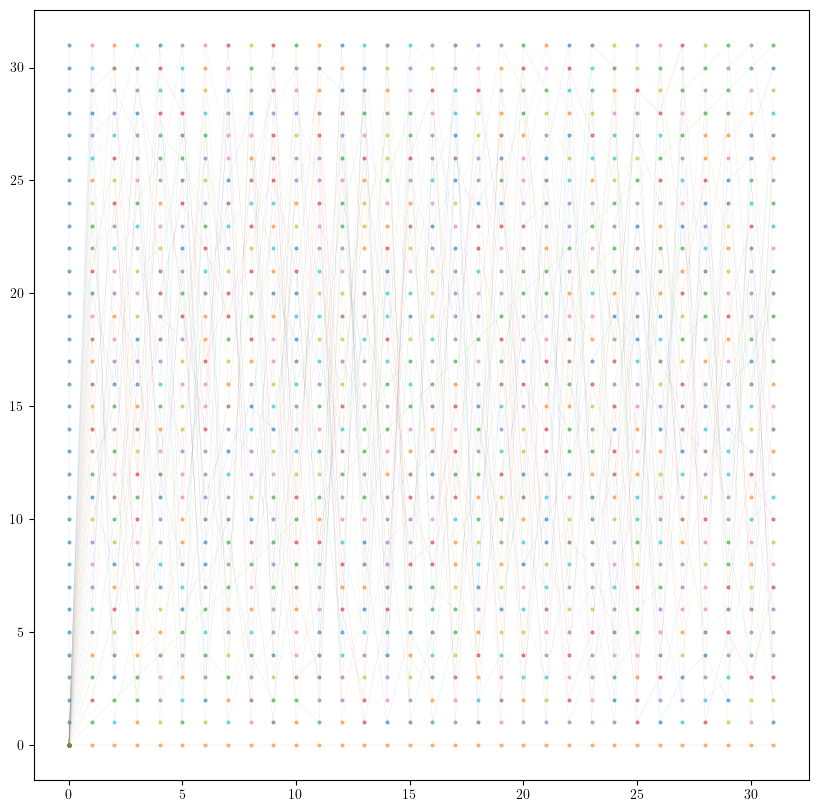

In [13]:
fig, ax = affineAx(F)
f = list(F)
# lines = A_lines(f[25], f[20])
lines = KantorSpread(F)
for i, line in enumerate(lines):
    x, y = np.array(line).T
    x = [toInt(e) for e in x]
    y = [toInt(e) for e in y]

    alpha = 0.5

    ax.plot(
        x, y,
        marker='o',
        linewidth=0.1,
        markersize=2,
        alpha=alpha
    )
plt.show()

In [16]:
def KantorLines(x,y):
    bs = [y - m**2*x + m*x.trace() + (m*x).trace() for m in F]
    lines = [[(x, u) for u in F]]
    for i, m in enumerate(F):
        line = [(x, m**2*x + m*x.trace() + (m*x).trace() + bs[i]) for x in F]
        lines.append(line)
    return lines

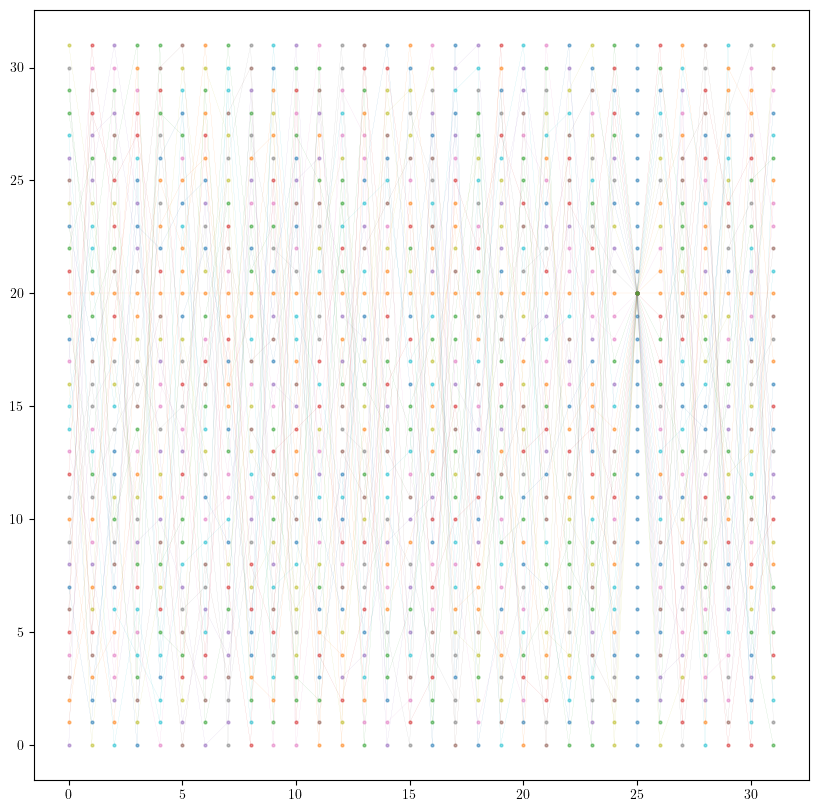

In [17]:
fig, ax = affineAx(F)
f = list(F)
lines = KantorLines(f[25], f[20])
for i, line in enumerate(lines):
    x, y = np.array(line).T
    x = [toInt(e) for e in x]
    y = [toInt(e) for e in y]

    alpha = 0.5

    ax.plot(
        x, y,
        marker='o',
        linewidth=0.1,
        markersize=2,
        alpha=alpha
    )
plt.show()

In [20]:

def npProj(v):
    """ Projection operator from quantum state. """
    d = len(v)
    return np.kron(v.reshape((d,1)), v.conj())

def A(x, y, mubs):
    """ Point operator A(x,y). """
    d = F.order()
    bs = [x] + [y - m**2*x + m*x.trace() + (m*x).trace() for m in F]
    bi = [toInt(b) for b in bs]
    
    op = np.zeros((d,d), dtype='complex64')
    for k in range(d + 1):
        B = mubs[d*k:d*(k+1),:]
        p = npProj(B[:,bi[k]])
        op += p
        
    return op - identity_matrix(d)

def Wigner(rho, x, y):
    """ Wigner function evaluated at the point (x,y). """
    d = F.order()
    return (rho @ A(x, y, mubs_kantor)).trace() / d

def WignerMatrix(rho):
    """ Wigner function for state $\rho$. """
    d = rho.shape[0]
    W = np.zeros((d,d))
    for i, x in enumerate(F):
        for j, y in enumerate(F):
            W[i,j] = np.real(Wigner(rho, x, y))
    return np.rot90(W)

In [46]:
def plotWigner(M, rotate=True):
    if rotate:
        M = np.rot90(M, -1)

    n = np.size(M)
    xpos, ypos = np.meshgrid(range(M.shape[0]), range(M.shape[1]))
    xpos = xpos.T.flatten() - 0.5
    ypos = ypos.T.flatten() - 0.5
    zpos = np.zeros(n)
    dx = dy = 0.8 * np.ones(n)
    dz = np.real(M.flatten())

    z_min = min(dz)
    z_max = max(dz)
    if z_min == z_max:
        z_min -= 0.1
        z_max += 0.1

    norm = mpl.colors.Normalize(z_min, z_max)
    cmap = mpl.colormaps['viridis']
    colors = cmap(norm(dz))

    fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(projection='3d', azim=145, elev=35)
    ax = fig.add_subplot(projection='3d', azim=-35, elev=35)

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)

    # x axis
    # ax.axes.xaxis.set_major_locator(plt.IndexLocator(1, 0))

    # y axis
    # ax.axes.yaxis.set_major_locator(plt.IndexLocator(1, -1))
    # ax.invert_yaxis()

    # labels_x = [r'$\uparrow\uparrow$',
    #           r'$\uparrow\downarrow$',
    #           r'$\downarrow\uparrow$',
    #           r'$\downarrow\downarrow$']
    # labels_y = [r'$\rightarrow\rightarrow$',
    #           r'$\rightarrow\leftarrow$',
    #           r'$\leftarrow\rightarrow$',
    #           r'$\leftarrow\leftarrow$']
    # ax.set_xticklabels(labels_x)
    # ax.set_yticklabels(labels_y)
    # ax.set_xticklabels(range(n))
    # ax.set_yticklabels(range(n))

    # z axis
    # ax.axes.zaxis.set_major_locator(plt.IndexLocator(1, 0.5))
    ax.set_zlim3d([-0.015, 0.035])

    cax, kw = mpl.colorbar.make_axes(ax, shrink=.75, pad=.1)
    mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)

    return fig, ax

In [32]:
# Examples
s = mubs_kantor[32*5:32*6,5]
w = WignerMatrix(npProj(s))

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

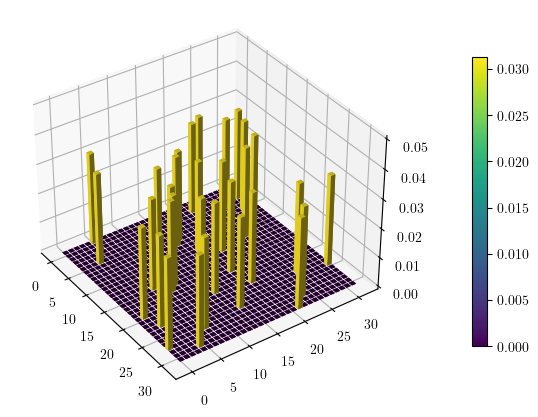

In [41]:
plotWigner(w)

In [42]:
s = mubs[0:32, 10] + mubs[0:32, 25]
s = s / np.linalg.norm(s)
w = WignerMatrix(npProj(s))

(<Figure size 1000x500 with 2 Axes>, <Axes3D: >)

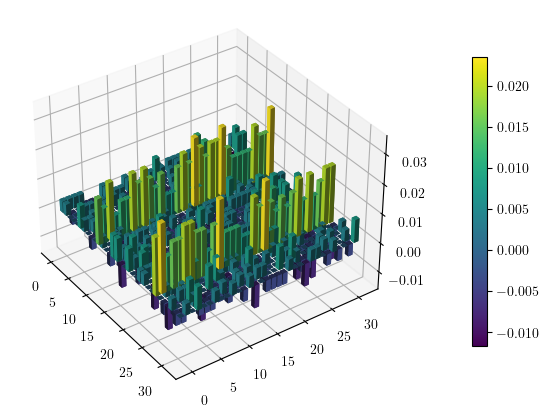

In [47]:
plotWigner(w)

In [30]:
w[:, 26].sum()

-5.9604641222676946e-08

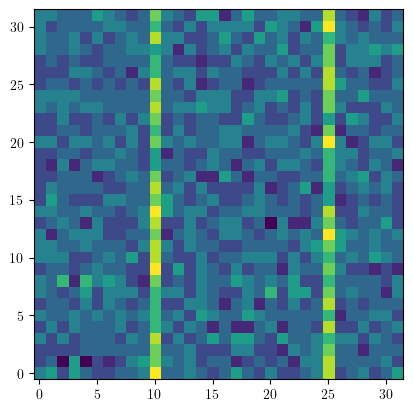

In [53]:
fig, ax = plt.subplots()

# ax.invert_yaxis()
ax.imshow(w, origin='lower')